# Two Moons Diffusion

First we start by generating a two moons distribution and visualizing it using matplotlib.

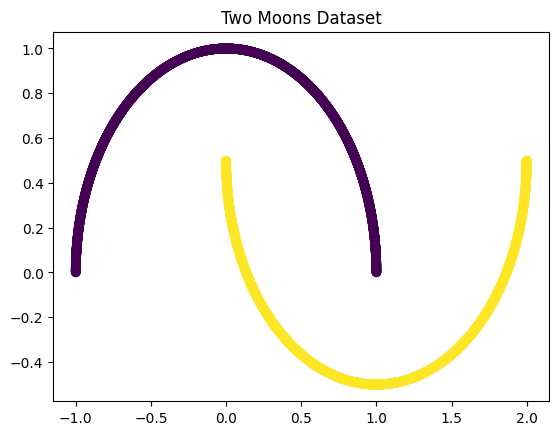

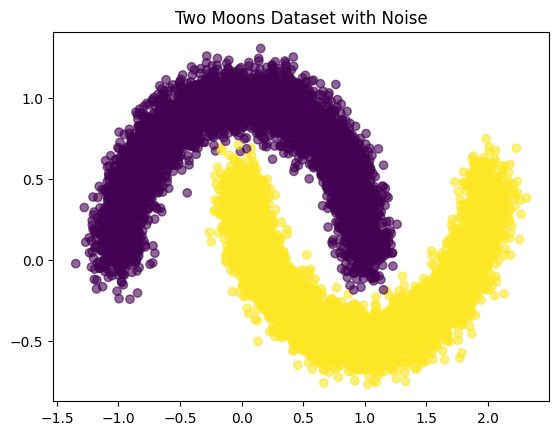

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np

def visualize_moons(dataset, title="Two Moons Dataset"):
    coords, labels = dataset
    plt.scatter(coords[:, 0], coords[:, 1], c=labels, alpha=0.6)
    plt.title(title)
    plt.show()


random_seed = 42
torch.manual_seed(random_seed)
np.random.seed(random_seed)
torch.set_default_device('cuda')

moons_dataset_unnoised = make_moons(n_samples=10000, random_state=random_seed)
visualize_moons(moons_dataset_unnoised)

moons_dataset_noised = make_moons(n_samples=10000, noise=0.1, random_state=random_seed)
visualize_moons(moons_dataset_noised, title="Two Moons Dataset with Noise")


We implement diffusion with DDPM formulation and DDIM sampling that is a deterministic Euler method.

For the noise predictor network we use a very simple architecture, consisting of a time embedder and a small MLP to predict the noise from the samples and the time embedding.  We can improve the architecture later if needed.